In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

## 1. Impementing the given image transformation

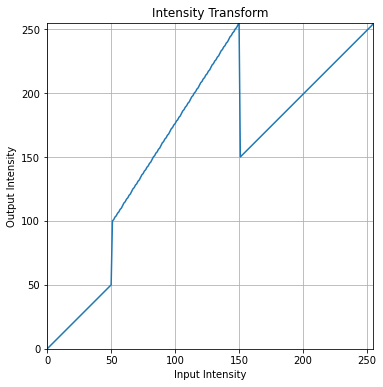

In [3]:
c = np.array([(50,50),(50,100),(150,255),(150,150)])
t1 = np.linspace(0, c[0,1], c[0,0]+1-0).astype('uint8')
t2 = np.linspace(c[1,1], c[2,1], c[2,0] - c[1,0]).astype('uint8')
t3 = np.linspace(c[3,1], 255, 255 - c[3,0]).astype('uint8')

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
assert len(transform) == 256

fig , ax = plt.subplots()
fig.set_size_inches(6,6)
ax.plot(transform)
ax.grid(True)
ax.set_title('Intensity Transform')
ax.set_xlabel('Input Intensity')
ax.set_ylabel('Output Intensity')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('1_transform.png')
plt.show()

In [4]:
img_orig=cv.imread ('images/emma.jpg',cv.IMREAD_GRAYSCALE)
assert img_orig is not None
cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
cv.imshow("Image",img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig,transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

## 2. Apply point intensity operations to accentuate,

### 2.1 White matter

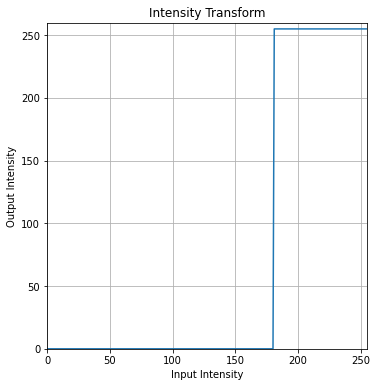

In [5]:
lower_thresh = 180
upper_thresh = 255
c = np.array([(0,lower_thresh),(lower_thresh,upper_thresh)])
t1 = np.linspace(0, c[0,0], c[0,1]+1-0).astype('uint8')
t2 = np.linspace(c[1,1], 255, 255 - c[1,0]).astype('uint8')

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
assert len(transform) == 256


fig , ax = plt.subplots()
fig.set_size_inches(6,6)
ax.plot(transform)
ax.grid(True)
ax.set_title('Intensity Transform')
ax.set_xlabel('Input Intensity')
ax.set_ylabel('Output Intensity')
ax.set_xlim(0,255)
ax.set_ylim(0,260)
ax.set_aspect('equal')
plt.savefig('2_1_white_matter_transform.png')
plt.show()

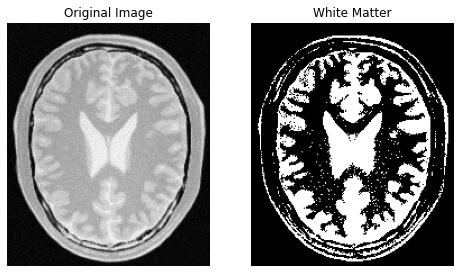

In [6]:
img_orig=cv.imread ('images/BrainProtonDensitySlice9.png',cv.IMREAD_GRAYSCALE)
assert img_orig is not None

fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(img_orig, cmap='gray')  # Display grayscale image
ax[0].set_title('Original Image')
ax[0].axis('off')

image_transformed = cv.LUT(img_orig, transform)
ax[1].imshow(image_transformed, cmap='gray')  # Display grayscale transformed image
ax[1].set_title('White Matter')
ax[1].axis('off')

plt.show()

### 2.2 Gray matter

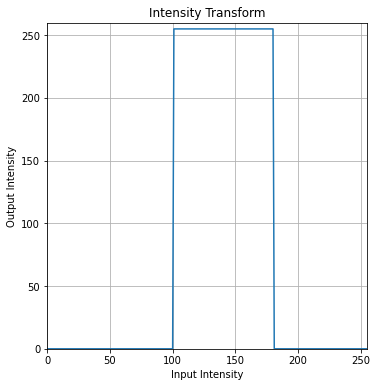

In [7]:
lower_thresh = 100
upper_thresh = 180
c = np.array([(0,lower_thresh),(lower_thresh,255),(upper_thresh,255)])
t1 = np.linspace(0, c[0,0], c[0,1]+1-0).astype('uint8')
t2 = np.linspace(c[1,1],c[2,1],c[2,0] - c[1,0] ).astype('uint8')
t3 = np.linspace(0, 0, 255 - c[2,0]).astype('uint8')

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
assert len(transform) == 256

fig , ax = plt.subplots()
fig.set_size_inches(6,6)
ax.plot(transform)
ax.grid(True)
ax.set_title('Intensity Transform')
ax.set_xlabel('Input Intensity')
ax.set_ylabel('Output Intensity')
ax.set_xlim(0,255)
ax.set_ylim(0,260)
ax.set_aspect('equal')
plt.savefig('2_2_gray_matter_transform.png')
plt.show()

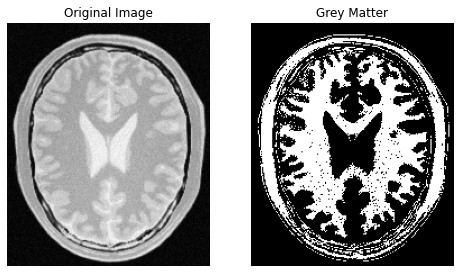

In [8]:
img_orig=cv.imread ('images/BrainProtonDensitySlice9.png',cv.IMREAD_GRAYSCALE)
assert img_orig is not None

fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(img_orig, cmap='gray')  # Display grayscale image
ax[0].set_title('Original Image')
ax[0].axis('off')

image_transformed = cv.LUT(img_orig, transform)
ax[1].imshow(image_transformed, cmap='gray')  # Display grayscale transformed image
ax[1].set_title('Grey Matter')
ax[1].axis('off')

plt.show()

## 3. Gamma Correction

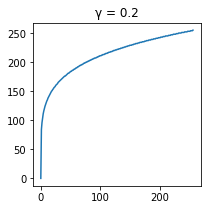

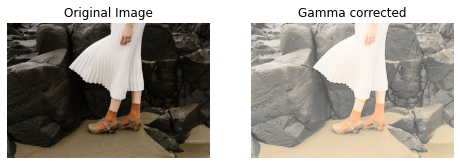

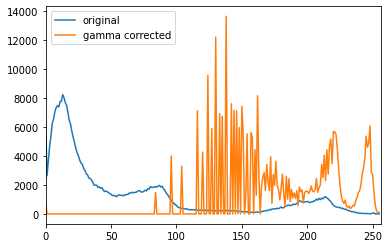

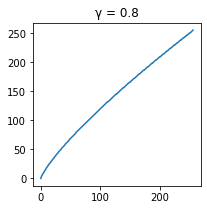

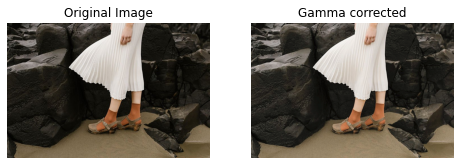

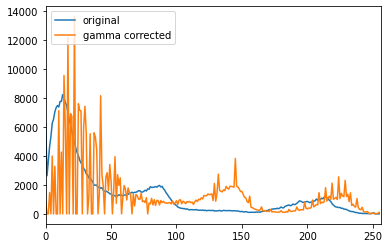

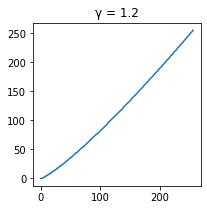

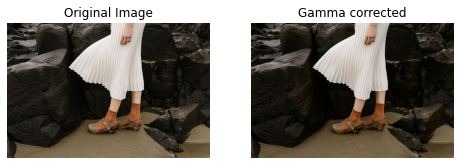

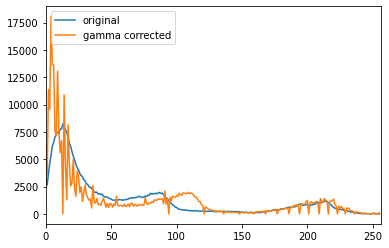

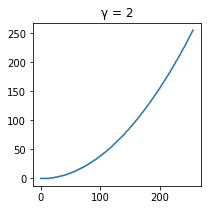

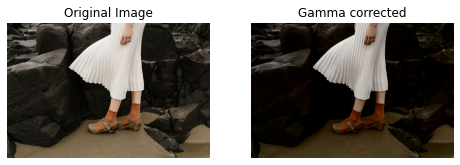

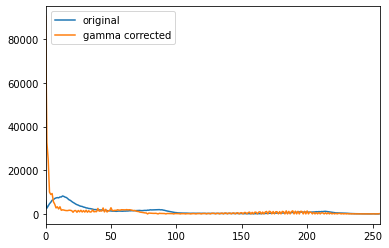

In [10]:
img = cv.imread("images/highlights_and_shadows.jpg")
L, a, b = cv.split(cv.cvtColor(img, cv.COLOR_BGR2LAB))
gamma = [0.2, 0.8, 1.2, 2]

for i in gamma:
    t = np.array([(p/255)**i*255 for p in range(0,256)]).astype(np.uint8)
    g = cv.LUT(L, t)
    
    corrected_img = cv.merge([g, a, b])

    hist1 = cv.calcHist([img], [0], None, [256], [0, 256])
    hist2 = cv.calcHist([corrected_img], [0], None, [256], [0, 256])

    fig, ax = plt.subplots(figsize=(3, 3))
    ax.set_title("\u03B3 = " + str(i))
    ax.plot(t)
    
    
    fig, ax = plt.subplots(1, 2, figsize=(8, 8))
    ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    
    ax[1].imshow(cv.cvtColor(corrected_img, cv.COLOR_LAB2RGB))
    ax[1].set_title('Gamma corrected')
    ax[1].axis('off')
    plt.show()

    plt.plot(hist1)
    plt.xlim([0, 256])
    plt.plot(hist2)
    plt.xlim([0, 256])
    plt.legend(('original', 'gamma corrected'), loc='upper left')
    plt.show()


## 4. Aplying an intensity transformation to the saturation plane

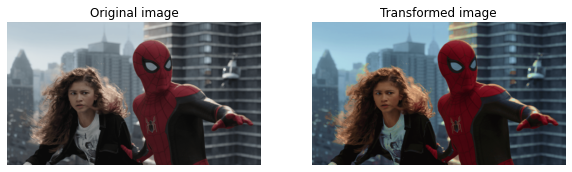

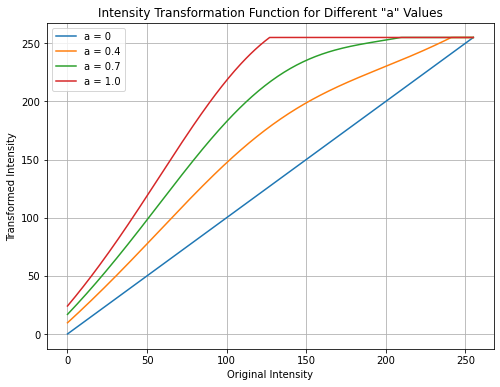

In [29]:
# Load the image in BGR color space
image_bgr = cv.imread('images/spider.png', cv.IMREAD_COLOR)

# Convert the BGR image to HSV color space
image_hsv = cv.cvtColor(image_bgr, cv.COLOR_BGR2HSV)

# Extract the saturation (S) plane
h, saturation_plane, v = cv.split(image_hsv)

# Define the intensity transformation function
def intensity_transform(x, a, sigma=70):
    f_x = np.clip(x+a*128*np.exp(-(x-128)**2/(2*sigma**2)), 0, 255)
    return f_x

# Apply the intensity transform function
transforemed_saturation_plane = intensity_transform(saturation_plane, 0.4)

image_copy = image_hsv.copy()
# recombine the planes
image_copy[:, :, 1] = transforemed_saturation_plane

# Convert the HSV image back to BGR color space
original_image = cv.cvtColor(image_hsv, cv.COLOR_HSV2RGB)
transformed_image = cv.cvtColor(image_copy, cv.COLOR_HSV2RGB)

# Display the images and plots
f, axarr = plt.subplots(1, 2, figsize=(10, 5))
axarr[0].imshow(original_image)
axarr[0].set_title('Original image')
axarr[0].axis('off')
axarr[1].imshow(transformed_image)
axarr[1].set_title('Transformed image')
axarr[1].axis('off')

intensity_values = np.arange(256)
a_values = [0, 0.4, 0.7, 1.0]
plt.figure(figsize=(8, 6))

for a in a_values:
    transformation_values = intensity_transform(intensity_values, a)
    plt.plot(intensity_values, transformation_values, label=f'a = {a}')

plt.title('Intensity Transformation Function for Different "a" Values')
plt.xlabel('Original Intensity')
plt.ylabel('Transformed Intensity')
plt.legend()
plt.grid(True)
plt.show()


## 5. Histogram Equalization

In [67]:
def histogram_equalization(im):
    """
    Histogram Equalization
    :param im: relative input image location
    :performs histogram equalization
    """
    img = cv.imread(im,cv.IMREAD_GRAYSCALE)

    # Calculate the histogram of the image
    histogram = np.zeros(256, dtype=int)
    for pixel_value in img.flat:
        histogram[pixel_value] += 1

    # Calculate the cumulative distribution function (CDF)
    cdf = np.zeros(256, dtype=int)
    cdf[0] = histogram[0]
    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + histogram[i]

    # Perform histogram equalization
    num_pixels = img.size
    equalized_image = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel_value = img[i, j]
            equalized_pixel = int((cdf[pixel_value] / num_pixels) * 255)
            equalized_image[i, j] = equalized_pixel

    # Calculate the histogram of the equalized image
    histogram_equalized = np.zeros(256, dtype=int)
    for pixel_value in equalized_image.flat:
        histogram_equalized[pixel_value] += 1

    # Plot the original and equalized images
    fig, ax = plt.subplots(1, 2, figsize=(8, 8))
    ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    ax[1].imshow(equalized_image, cmap='gray')
    ax[1].set_title('Equalized Image')
    ax[1].axis('off')

    # Plot the original and equalized histograms
    fig, ax = plt.subplots(1, 2, figsize=(12,6))
    ax[0].plot(histogram)
    ax[0].set_title('Original Histogram')
    ax[0].set_xlim([0, 256])
    ax[1].plot(histogram_equalized)
    ax[1].set_title('Equalized Histogram')
    ax[1].set_xlim([0, 256])

    plt.show()



    # hist,bins = np.histogram(img.ravel(),256,[0,256])
    # cdf = hist.cumsum()
    # cdf_normalized = cdf * hist.max()/ cdf.max()
    # plt.plot(cdf_normalized, color = 'b')
    # plt.hist(img.flatten(),256,[0,256], color = 'r')
    # plt.xlim([0,256])
    # plt.legend(('cdf','histogram'), loc = 'upper left')
    # plt.title('Histogram for gray scale picture')
    # plt.show()
    # equ = cv.equalizeHist(img)
    # hist,bins = np.histogram(equ.ravel(),256,[0,256])
    # cdf = hist.cumsum()
    # cdf_normalized = cdf * hist.max()/ cdf.max()
    # plt.plot(cdf_normalized, color = 'b')
    # plt.hist(equ.flatten(),256,[0,256], color = 'r')
    # plt.xlim([0,256])
    # plt.legend(('cdf','histogram'), loc = 'upper left')
    # plt.title('Histogram of the Equalized Image')
    # plt.show()
    # res = np.hstack((img,equ)) #stacking images side-by-side    
    # plt.axis('off')
    # plt.imshow(res,cmap='gray')



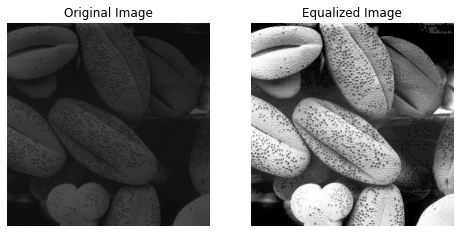

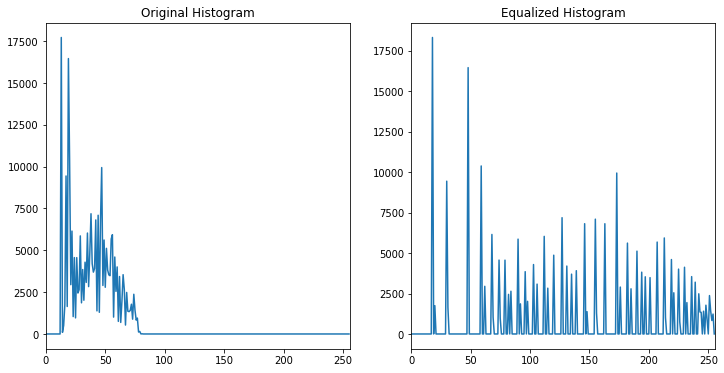

In [68]:
histogram_equalization('images/shells.tif')

## 6. Histogram equalization to the foreground

### 6.1

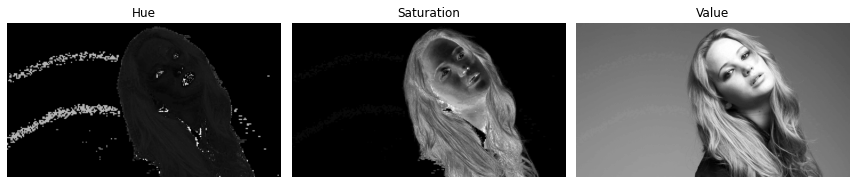

In [77]:
# Load the image
image = cv.imread('images/jeniffer.jpg')

# Convert the image to HSV
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Split the HSV image into H, S, and V components
hue, saturation, value = cv.split(hsv_image)

# Display the H, S, V planes in grayscale
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(hue, cmap='gray')
plt.title('Hue')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(saturation, cmap='gray')
plt.title('Saturation')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(value, cmap='gray')
plt.title('Value')
plt.axis('off')

plt.tight_layout()
plt.show()


### 6.3

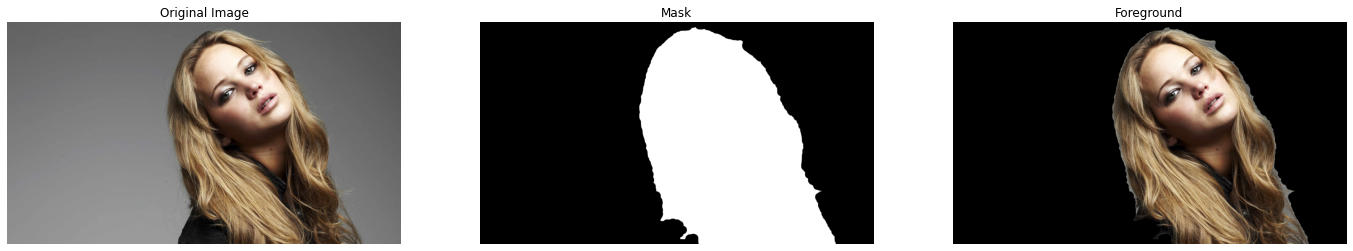

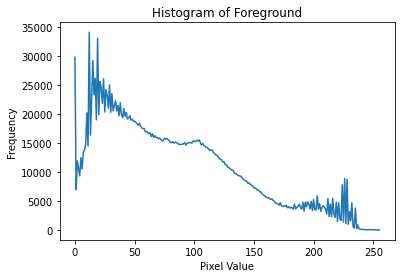

In [81]:
# Define the threshold values for saturation
saturation_min = 15
saturation_max = 255

# Create a binary mask based on saturation
foreground_mask = cv.inRange(saturation, saturation_min, saturation_max)

# Apply morphological operations to reduce noise
foreground_mask = cv.morphologyEx(foreground_mask, cv.MORPH_CLOSE, cv.getStructuringElement(cv.MORPH_ELLIPSE,(80, 80)))

# Obtain the foreground using cv.bitwise_and
foreground = cv.bitwise_and(image, image, mask=foreground_mask)

# Compute the histogram of the foreground
histogram = cv.calcHist([foreground], [0], foreground_mask, [256], [0, 256])

# Display the original image, mask, and foreground
plt.figure(figsize=(24, 8))

plt.subplot(131), plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB)), plt.title('Original Image'), plt.axis('off')
plt.subplot(132), plt.imshow(foreground_mask, cmap='gray'), plt.title('Mask'), plt.axis('off')
plt.subplot(133), plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB)), plt.title('Foreground'), plt.axis('off')
plt.show()

# Plot the histogram
plt.plot(histogram)
plt.title('Histogram of Foreground')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

### 6.4

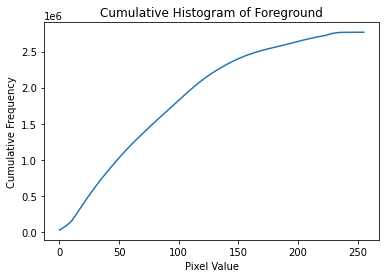

In [71]:
cumulative_histogram = np.cumsum(histogram)

# Plot the cumulative histogram
plt.plot(cumulative_histogram)
plt.title('Cumulative Histogram of Foreground')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Frequency')
plt.show()


### 6.5

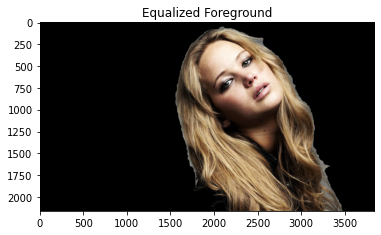

In [80]:
# Convert to hsv
hsv_foreground = cv.cvtColor(foreground, cv.COLOR_BGR2HSV)
value_foreground = hsv_foreground[:, :, 2]

# Apply histogram equalization
equalized_value_foreground = cv.equalizeHist(value_foreground)

hsv_foreground[:,:,2] = equalized_value_foreground

plt.imshow(cv.cvtColor(hsv_foreground, cv.COLOR_HSV2RGB)), plt.title('Equalized Foreground')
plt.show()

### 6.6

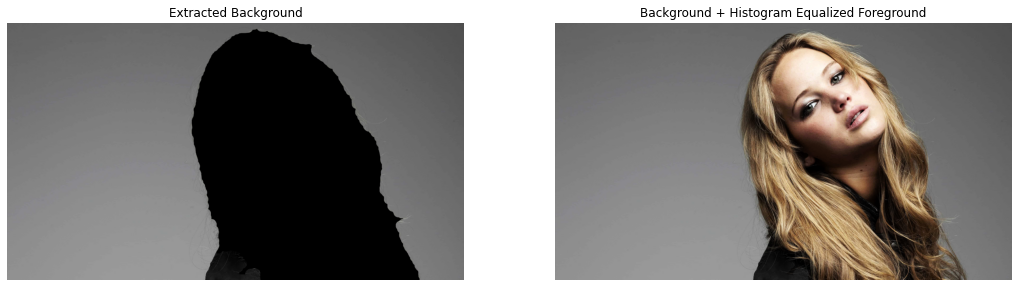

In [82]:
background_mask = cv.bitwise_not(foreground_mask)

# Obtain the background using cv.bitwise_and
extracted_background = cv.bitwise_and(image, image, mask=background_mask)

# Combine the background and histogram-equalized foreground
result = cv.add(extracted_background, cv.cvtColor(hsv_foreground, cv.COLOR_HSV2BGR))

plt.figure(figsize=(18, 6))

# Display the result
plt.subplot(121),plt.imshow(cv.cvtColor(extracted_background, cv.COLOR_BGR2RGB)),plt.title('Extracted Background'),plt.axis('off')
plt.subplot(122),plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB)),plt.title('Background + Histogram Equalized Foreground'),plt.axis('off')
plt.show()

## 7. Sobel Filtering

### 7.1 filter2D function

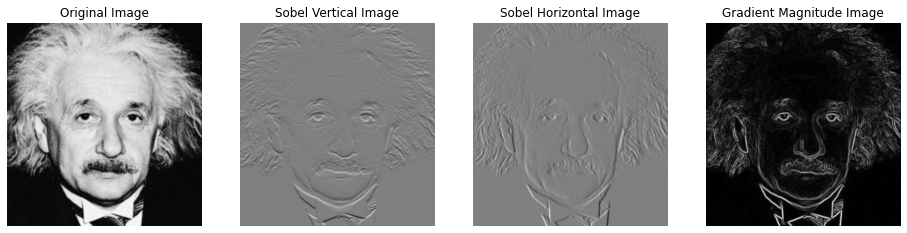

In [18]:
# Load the image in grayscale
im = cv.imread("images/einstein.png", cv.IMREAD_GRAYSCALE).astype(np.float32)

# Define Sobel kernels
sobel_v = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype='float32')
sobel_h = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype='float32')

# Apply Sobel filters
imv = cv.filter2D(im, -1, sobel_v)
imh = cv.filter2D(im, -1, sobel_h)

# Compute gradient magnitude
grad_mag = np.sqrt(imv**2 + imh**2)

# Create subplots for visualization
fig, axes = plt.subplots(1, 4, sharex='all', sharey='all', figsize=(16, 16))
axes[0].imshow(im, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Image')

axes[1].imshow(imv, cmap='gray', vmin=-1020, vmax=1020)
axes[1].set_title('Sobel Vertical Image')

axes[2].imshow(imh, cmap='gray', vmin=-1020, vmax=1020)
axes[2].set_title('Sobel Horizontal Image')

axes[3].imshow(grad_mag, cmap='gray')
axes[3].set_title('Gradient Magnitude Image')

# Turn off axis labels
for ax in axes:
    ax.axis('off')

# Display the figure
plt.show()


### 7.2 

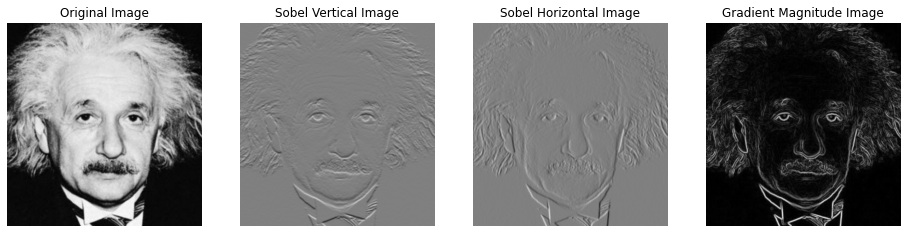

In [19]:
rows, columns = im.shape
kernal_size = 3

# when applied with a kernal of size f the resulting size of the image is (rows-f+1, columns-f+1)
imv = np.zeros((rows-kernal_size+1, columns-kernal_size+1), dtype='float32')
imh = np.zeros((rows-kernal_size+1, columns-kernal_size+1), dtype='float32')

# applying sobel filters
for row in range(rows-kernal_size+1):
    for column in range(columns-kernal_size+1):
        imv[row, column] = np.sum(im[row:row+kernal_size, column:column+kernal_size] * sobel_v)
        imh[row, column] = np.sum(im[row:row+kernal_size, column:column+kernal_size] * sobel_h)

# Compute gradient magnitude
grad_mag = np.sqrt(imv**2 + imh**2)

# Create subplots for visualization
fig, axes = plt.subplots(1, 4, sharex='all', sharey='all', figsize=(16, 16))
axes[0].imshow(im, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Image')

axes[1].imshow(imv, cmap='gray', vmin=-1020, vmax=1020)
axes[1].set_title('Sobel Vertical Image')

axes[2].imshow(imh, cmap='gray', vmin=-1020, vmax=1020)
axes[2].set_title('Sobel Horizontal Image')

axes[3].imshow(grad_mag, cmap='gray')
axes[3].set_title('Gradient Magnitude Image')

# Turn off axis labels
for ax in axes:
    ax.axis('off')

# Display the figure
plt.show()

### 7.3 

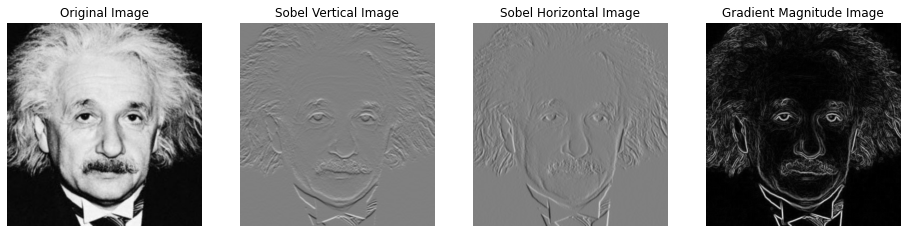

In [20]:
# Sobel kernels
sobel_h_kernel = np.array([1, 2, 1], dtype=np.float32)
sobel_v_kernel = np.array([1, 0, -1], dtype=np.float32)

# Apply Sobel filtering using sepFilter2D
im1 = cv.sepFilter2D(im, -1, sobel_h_kernel, sobel_v_kernel)
im2 = cv.sepFilter2D(im, -1, sobel_v_kernel, sobel_h_kernel)

# Compute gradient magnitude
grad_mag = np.sqrt(imv**2 + imh**2)

# Create a subplot for visualization
fig, axes = plt.subplots(1, 4, figsize=(16, 16))

# Display images
axes[0].imshow(im, cmap='gray', vmin=0, vmax=255)
axes[0].set_title("Original Image")

axes[1].imshow(im1, cmap='gray', vmin=-1020, vmax=1020)
axes[1].set_title("Sobel Vertical Image")

axes[2].imshow(im2, cmap='gray', vmin=-1020, vmax=1020)
axes[2].set_title("Sobel Horizontal Image")

axes[3].imshow(grad_mag, cmap='gray')
axes[3].set_title('Gradient Magnitude Image')

# Turn off axis labels
for ax in axes:
    ax.axis('off')

plt.show()


## 8. Zoom Images

In [2]:
def zoom_the_image(image, scale, method = 'nearest-neighbour'):
    '''
    inputs : Image as a numpy array, scale factor, method of interpolation
    outputs : zoomed image as a numpy array
    '''
    rows = round(scale*image.shape[0])
    cols = round(scale*image.shape[1])

    zoomed = np.zeros((rows, cols), dtype=image.dtype)

    if (method == 'nearest-neighbour'):
        for i in range(rows):
            for j in range(cols):
                original_i = min(int(round(i / scale)), image.shape[0] - 1)
                original_j = min(int(round(j / scale)), image.shape[1] - 1)
                zoomed[i][j] = image[original_i][original_j]
    
    if (method == 'bilinear interpolation'):
        for i in range(rows):
            for j in range(cols):
                x = i/scale
                y = j/scale
                x1 = int(np.floor(x))
                y1 = int(np.floor(y))
                x2 = int(np.ceil(x))
                y2 = int(np.ceil(y))
                if (x2 >= image.shape[0]):
                    x2 = x1
                if (y2 >= image.shape[1]):
                    y2 = y1
                dx = x - x1
                dy = y - y1
                zoomed[i][j] = image[x1][y1]*(1-dx)*(1-dy) + image[x1][y2]*(1-dx)*dy + image[x2][y1]*dx*(1-dy) + image[x2][y2]*dx*dy

    return zoomed


In [3]:
def normalized_SSD(original_image, zoomed_image):
    ssd = np.sum((original_image - zoomed_image) ** 2)
    max_possible_ssd = np.sum(original_image ** 2)
    normalized_ssd = ssd / max_possible_ssd
    return normalized_ssd

In [4]:
images = [cv.imread("images/zooming/im01small.png", cv.IMREAD_REDUCED_GRAYSCALE_2),cv.imread("images/zooming/im02small.png", cv.IMREAD_REDUCED_GRAYSCALE_2),
          cv.imread("images/zooming/im03small.png", cv.IMREAD_REDUCED_GRAYSCALE_2),cv.imread("images/zooming/im04small.png", cv.IMREAD_REDUCED_GRAYSCALE_2),
          cv.imread("images/zooming/im05small.png", cv.IMREAD_REDUCED_GRAYSCALE_2),cv.imread("images/zooming/im06small.png", cv.IMREAD_REDUCED_GRAYSCALE_2),
          cv.imread("images/zooming/im07small.png", cv.IMREAD_REDUCED_GRAYSCALE_2),cv.imread("images/zooming/im08small.png", cv.IMREAD_REDUCED_GRAYSCALE_2),
          cv.imread("images/zooming/im09small.png", cv.IMREAD_REDUCED_GRAYSCALE_2),cv.imread("images/zooming/im10small.png", cv.IMREAD_REDUCED_GRAYSCALE_2),
          cv.imread("images/zooming/im11small.png", cv.IMREAD_REDUCED_GRAYSCALE_2)]

large_originals = [cv.imread("images/zooming/im01.png", cv.IMREAD_REDUCED_GRAYSCALE_2),cv.imread("images/zooming/im02.png", cv.IMREAD_REDUCED_GRAYSCALE_2),
                   cv.imread("images/zooming/im03.png", cv.IMREAD_REDUCED_GRAYSCALE_2),cv.imread("images/zooming/im04.png", cv.IMREAD_REDUCED_GRAYSCALE_2),
                   cv.imread("images/zooming/im05.png", cv.IMREAD_REDUCED_GRAYSCALE_2),cv.imread("images/zooming/im06.png", cv.IMREAD_REDUCED_GRAYSCALE_2),
                   cv.imread("images/zooming/im07.png", cv.IMREAD_REDUCED_GRAYSCALE_2),cv.imread("images/zooming/im08.png", cv.IMREAD_REDUCED_GRAYSCALE_2),
                   cv.imread("images/zooming/im09.png", cv.IMREAD_REDUCED_GRAYSCALE_2),cv.imread("images/zooming/im10.png", cv.IMREAD_REDUCED_GRAYSCALE_2),
                   cv.imread("images/zooming/im11.png", cv.IMREAD_REDUCED_GRAYSCALE_2)]

scale = 4
for i in range (0,len(images)):
    zoomed_image_nearest = zoom_the_image(images[i], scale, 'nearest-neighbour')
    zoomed_image_bilinear = zoom_the_image(images[i], scale, 'bilinear interpolation')

    try:
        assert large_originals[i].shape == zoomed_image_nearest.shape
    except AssertionError:
        # Resize the zoomed image to match the size of the original using interpolation
        print(zoomed_image_nearest.shape)
        print(large_originals[i].shape)
        zoomed_image_nearest = cv.resize(zoomed_image_nearest, (large_originals[i].shape[1],large_originals[i].shape[0]), interpolation=cv.INTER_NEAREST)
        print(zoomed_image_nearest.shape)
        zoomed_image_bilinear = cv.resize(zoomed_image_bilinear, (large_originals[i].shape[1],large_originals[i].shape[0]), interpolation=cv.INTER_LINEAR)

    finally:
        ssd_nearest = normalized_SSD(zoomed_image_nearest, large_originals[i])
        ssd_bilinear = normalized_SSD(zoomed_image_bilinear, large_originals[i])
        cv.namedWindow("Original Image",cv.WINDOW_AUTOSIZE)
        cv.imshow("Original Image",images[i])
        cv.waitKey(0)

        cv.imshow("Zoomed Image Nearest", zoomed_image_nearest)
        cv.waitKey(0)

        cv.imshow("Zoomed Image Bilinear", zoomed_image_bilinear)
        cv.waitKey(0)

        cv.imshow("Large Original Image", large_originals[i])
        cv.waitKey(0)
        cv.destroyAllWindows()

        
        print("SSD for image " + str(i+1) +  " using nearest-neighbour method: "+ str(ssd_nearest))

        
        print("SSD for image " + str(i+1) +  " using bilinear interpolation method: "+ str(ssd_bilinear))



SSD for image 1 using nearest-neighbour method: 0.4983854582585421
SSD for image 1 using bilinear interpolation method: 0.4926570042958479
SSD for image 2 using nearest-neighbour method: 0.2038400748897426
SSD for image 2 using bilinear interpolation method: 0.20018972291339246
(728, 1200)
(729, 1200)
(729, 1200)
SSD for image 3 using nearest-neighbour method: 0.233937861104547
SSD for image 3 using bilinear interpolation method: 0.23825720999713718
SSD for image 4 using nearest-neighbour method: 0.6988846718481262
SSD for image 4 using bilinear interpolation method: 0.6976349639738012
SSD for image 5 using nearest-neighbour method: 0.4445643049457302
SSD for image 5 using bilinear interpolation method: 0.4371540959644413
SSD for image 6 using nearest-neighbour method: 0.44210623070750305
SSD for image 6 using bilinear interpolation method: 0.4541386062005031
SSD for image 7 using nearest-neighbour method: 0.2553798097871679
SSD for image 7 using bilinear interpolation method: 0.253706

## 9. Image Segentation and Enhancing

### 9.1 & 9.2

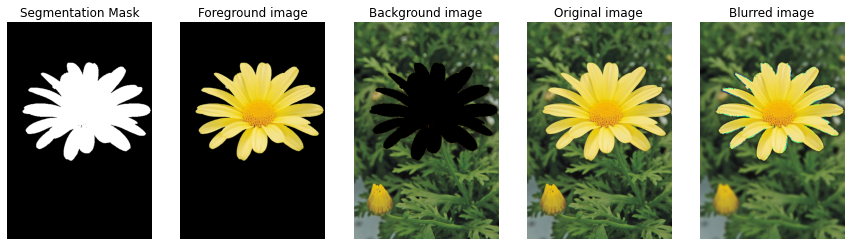

In [12]:
# Load the image
img = cv.imread("images/daisy.png")

# Initialize mask and models for GrabCut
mask = np.zeros(img.shape[:2], np.uint8)
background_model = np.zeros((1, 65), np.float64)
foreground_model = np.zeros((1, 65), np.float64)
rectangle = (40, 10, 505, 505)

# Perform initial GrabCut with rectangle
cv.grabCut(img, mask, rectangle, background_model, foreground_model, 5, cv.GC_INIT_WITH_RECT)

# Create segmentation mask for foreground
mask1 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
img1 = img * mask1[:, :, np.newaxis]

# Create segmentation mask for background
cv.grabCut(img, mask, rectangle, background_model, foreground_model, 5, cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask == 3) | (mask == 1), 0, 1).astype('uint8')
img2 = img * mask2[:, :, np.newaxis]

# Create a blurred image using the segmented images
blurred_img = img1 + cv.GaussianBlur(img2, (15, 15), 0)

# Display the results using matplotlib
fig, ax = plt.subplots(1, 5, figsize=(15, 15))

# Display the segmentation mask
ax[0].imshow(mask1, cmap='gray')
ax[0].set_title("Segmentation Mask")
ax[0].axis("off")

# Display the foreground image
ax[1].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
ax[1].set_title("Foreground image")
ax[1].axis("off")

# Display the background image
ax[2].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax[2].set_title("Background image")
ax[2].axis("off")

# Display the original image
ax[3].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[3].set_title("Original image")
ax[3].axis("off")

# Display the blurred image
ax[4].imshow(cv.cvtColor(blurred_img, cv.COLOR_BGR2RGB))
ax[4].set_title("Blurred image")
ax[4].axis("off")

# Show all the plots
plt.show()
